In [30]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
fast = pd.read_csv("../results_remote/output_places_US_knn_preloaded.csv")
ckqst = pd.read_csv("../results_remote/output_places_US_ckqst_preloaded.csv")
ckqst_v2 = pd.read_csv("../results_remote/output_places_US_ckqstv2_preloaded.csv")
ckqst_v2['name'] = "ckqst_v2_NO"

res = pd.concat([
    fast.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
    ckqst_v2.loc[:, ['creation_time', 'search_time', 'num_queries', 'name']],
])
res = res[res['name'].isin(['fast_NO', 'ckqst_NO', 'ckqst_v2_NO'])]

name_map = {
    "places_knn": "Naive",
    "fast_NO": "FAST (Existing Objects)",
    "ckqst_NO": "CkQST (Existing Objects)",
    "ckqst_v2_NO": "CkQST w/Object Idx. (Existing Objects)"
}
res['name'] = res['name'].apply(lambda x: name_map[x])

res

,creation_time,search_time,num_queries,name
0,253097135,4804825390,100000,FAST (Existing Objects)
1,248865754,5144549281,100000,FAST (Existing Objects)
2,380891880,5458990074,100000,FAST (Existing Objects)
3,428470582,28922681794,500000,FAST (Existing Objects)
4,1281465111,68481704807,1000000,FAST (Existing Objects)
5,3029874391,218830500550,2500000,FAST (Existing Objects)
6,3297754509,200162045864,2500000,FAST (Existing Objects)
7,2336681928,215797043637,2500000,FAST (Existing Objects)
8,4684629364,444935699362,5000000,FAST (Existing Objects)
9,4438391760,501754360568,5000000,FAST (Existing Objects)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Index creation time (sec)'>

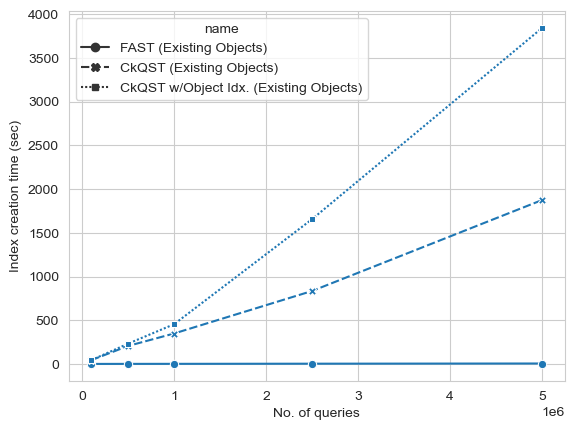

In [32]:
search_res = res.loc[:, ['creation_time', 'num_queries', 'name']]
search_res = search_res[search_res['num_queries'] > 10000]
search_res['Index creation time (sec)'] = search_res['creation_time'].apply(lambda x: x) / 1000000000
search_res = search_res.rename(columns={"num_queries": "No. of queries"})

sns.lineplot(x="No. of queries", y='Index creation time (sec)', style='name', data=search_res, errorbar=None, markers=True)

In [33]:
test = pd.DataFrame(res[res['num_queries'] == 500000])
test['search_time'] = test['search_time'].apply(lambda x: x / 500000)
test

,creation_time,search_time,num_queries,name
3,428470582,5.784536e+04,500000,FAST (Existing Objects)
11,1000773698,5.110959e+04,500000,FAST (Existing Objects)
13,1032695303,5.788525e+04,500000,FAST (Existing Objects)
2,212542433963,1.646967e+04,500000,CkQST (Existing Objects)
3,198836824971,1.415917e+04,500000,CkQST (Existing Objects)
1,231754084451,1.214807e+06,500000,CkQST w/Object Idx. (Existing Objects)


In [34]:
res[res['num_queries'] == 2500000]

,creation_time,search_time,num_queries,name
5,3029874391,218830500550,2500000,FAST (Existing Objects)
6,3297754509,200162045864,2500000,FAST (Existing Objects)
7,2336681928,215797043637,2500000,FAST (Existing Objects)
6,841274510690,45486635922,2500000,CkQST (Existing Objects)
7,828099938499,61518929619,2500000,CkQST (Existing Objects)
3,1656058955132,4489929018606,2500000,CkQST w/Object Idx. (Existing Objects)


/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/udeshuk/Library/miniconda3/envs/fast/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='No. of queries', ylabel='Query Matching Time (ms)'>

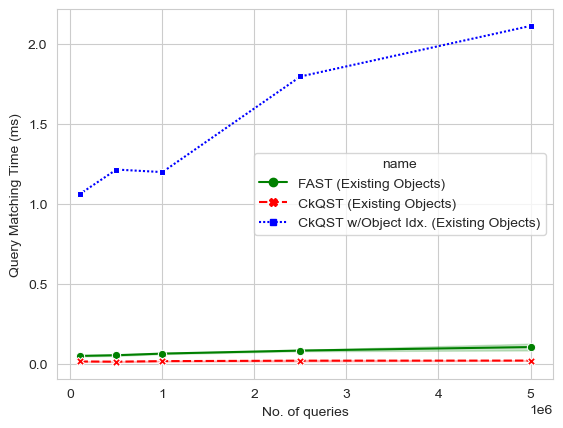

In [37]:
search_res = res.loc[:, ['search_time', 'num_queries', 'name']]
search_res['Query Matching Time (ms)'] = search_res['search_time'].apply(lambda x: x) / (search_res['num_queries'] * 1000000)
search_res = search_res.rename(columns={"num_queries": "No. of queries"})
# create_res['experiment'] = create_res['name'].apply(expName)

sns.lineplot(x="No. of queries", y='Query Matching Time (ms)', hue='name', style='name', data=search_res, errorbar='sd', palette=['g', 'r', 'b'], markers=True)

In [36]:
# Optimization
# - Custom iterator
# - Circle bound calculation